In [1]:
#importing necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#reading csv file into dateframe
df = pd.read_csv(r'C:\Users\M RAJESH\Desktop\Ekeeda DS\titanic_train.csv')

In [3]:
#printing 1st 5 records of the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking shape of the dataframe
df.shape

(891, 12)

In [5]:
#checking missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#checking datatype of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#dropping unnecessary columns
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

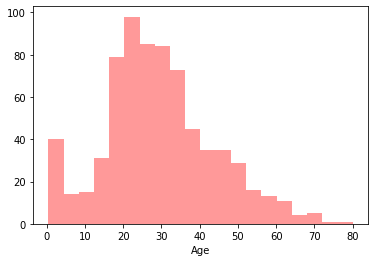

In [8]:
#plotting histogram for age column
sns.distplot(df['Age'],kde=False,color="red")

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

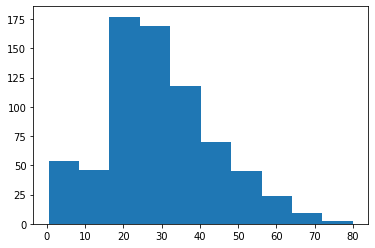

In [9]:
plt.hist(df['Age'])

In [10]:
#checking mean of peoples age in particular Pclass
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [11]:
#defining the function to replace the age of particilar Pclass with respect to their Pclass mean
def agee(cols):
    Age    = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [12]:
#replacing the missing values in age column 
df['Age'] = df[['Age', 'Pclass']].apply(agee, axis=1)

In [13]:
df['Age'].value_counts() 

25.00    159
38.00     41
29.00     31
24.00     30
22.00     27
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64

In [14]:
#again checking the missing values in each column
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [15]:
#as Embarked has only 2 values are missing so dropping that particulatr record
df.dropna(inplace=True)

In [16]:
#Again checking the missing values in columns
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,25.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\M RAJESH\anac

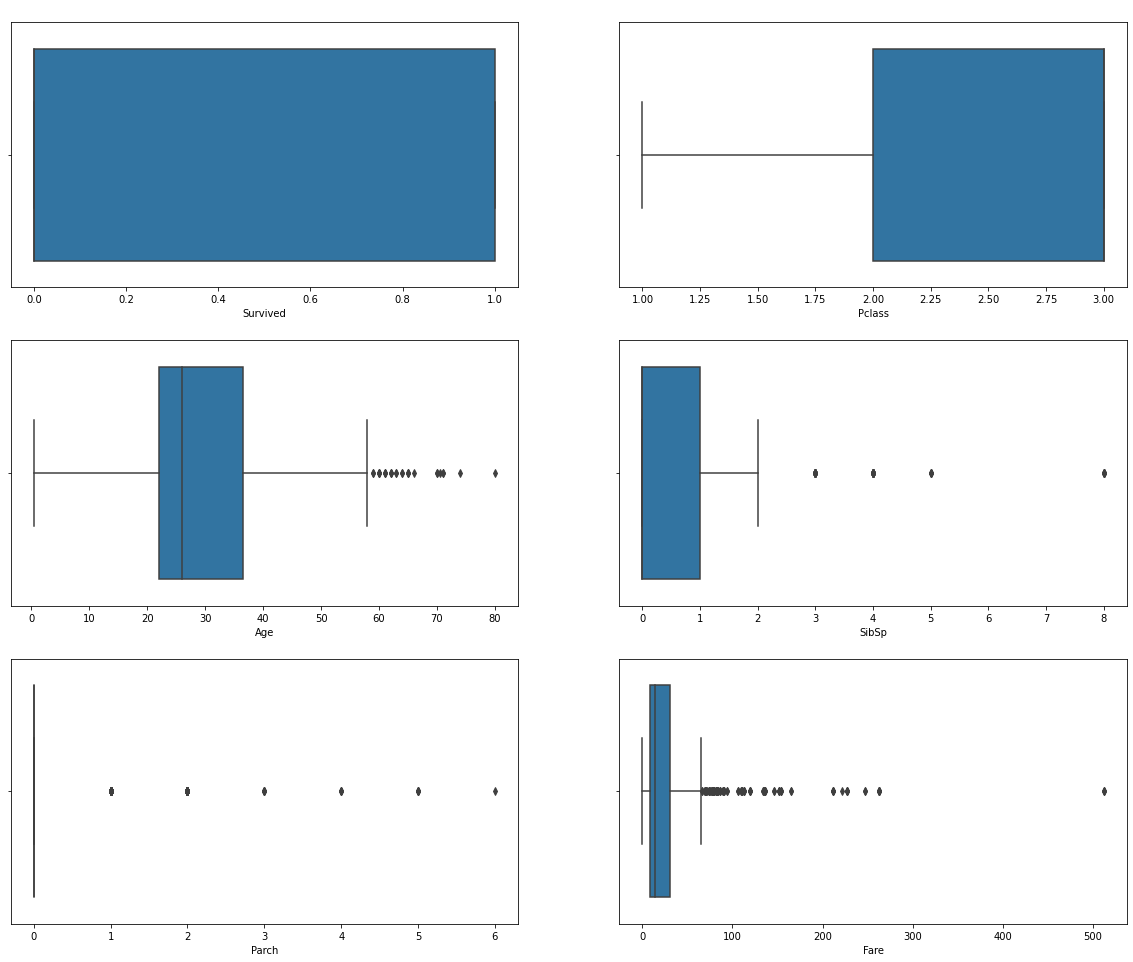

In [18]:
#plotting the boxplot for each numerical column
j=1
plt.figure(figsize=(20,40))
col = ['Survived','Pclass','Age','SibSp','Parch','Fare']
for i in col:
    plt.subplot(len(col)+1,2,j)
    sns.boxplot(df[i])
    plt.title(i,color='white')
    j=j+1

In [19]:
#counting the no.of people had sibsp based on survived
df[['SibSp','Survived']].value_counts()

SibSp  Survived
0      0           398
       1           208
1      1           112
       0            97
2      0            15
4      0            15
2      1            13
3      0            12
8      0             7
5      0             5
3      1             4
4      1             3
dtype: int64

In [20]:
#treating of outliers in sibsp column
df['SibSp']=df['SibSp'].apply(lambda x: 3 if x>=4 else x)

In [21]:
#checking count of  no.of people had sibsp based on survived
df[['SibSp','Survived']].value_counts()

SibSp  Survived
0      0           398
       1           208
1      1           112
       0            97
3      0            39
2      0            15
       1            13
3      1             7
dtype: int64

In [22]:
df['Age'].mean()

29.20604049493813

In [23]:
#treating outliers in age column
df['Age']=df['Age'].apply(lambda x: df['Age'].mean() if x>55 else x)

In [24]:
#checking count of  no.of people had parch based on survived
df[['Parch','Survived']].value_counts()

Parch  Survived
0      0           445
       1           231
1      1            65
       0            53
2      0            40
       1            40
4      0             4
5      0             4
3      1             3
       0             2
5      1             1
6      0             1
dtype: int64

In [25]:
#treating outliers in paarch column
df['Parch']=df['Parch'].apply(lambda x: 3 if x>=4 else x)

In [26]:
#checking count of  no.of survived based on fare
df[['Survived','Fare']].value_counts(ascending=True).head(60)

Survived  Fare    
0         90.0000     1
          47.1000     1
          49.5042     1
          50.0000     1
          50.4958     1
          51.8625     1
          55.9000     1
          61.1750     1
          61.3792     1
          61.9792     1
          66.6000     1
          71.0000     1
          78.8500     1
          79.6500     1
          82.1708     1
          83.4750     1
          106.4250    1
          108.9000    1
          110.8833    1
          113.2750    1
          135.6333    1
          153.4625    1
          211.5000    1
          221.7792    1
1         59.4000     1
0         227.5250    1
          42.4000     1
          40.1250     1
1         71.2833     1
          71.0000     1
0         28.5000     1
          28.7125     1
          30.0000     1
          30.0708     1
          30.5000     1
          31.0000     1
1         66.6000     1
0         31.3875     1
          32.3208     1
          33.0000     1
          33.5000    

C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

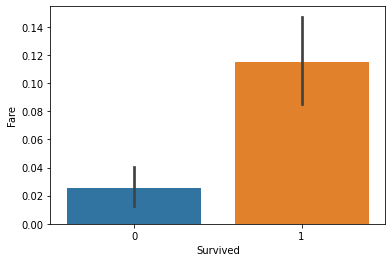

In [27]:
#plotting the bargraph for survived and fare
sns.barplot(df['Survived'],df['Fare']>100)

In [28]:
#treating outliers in fare column
df['Fare']=df['Fare'].apply(lambda x: df['Fare'].mean() if x>100 else x)

C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\M RAJESH\anac

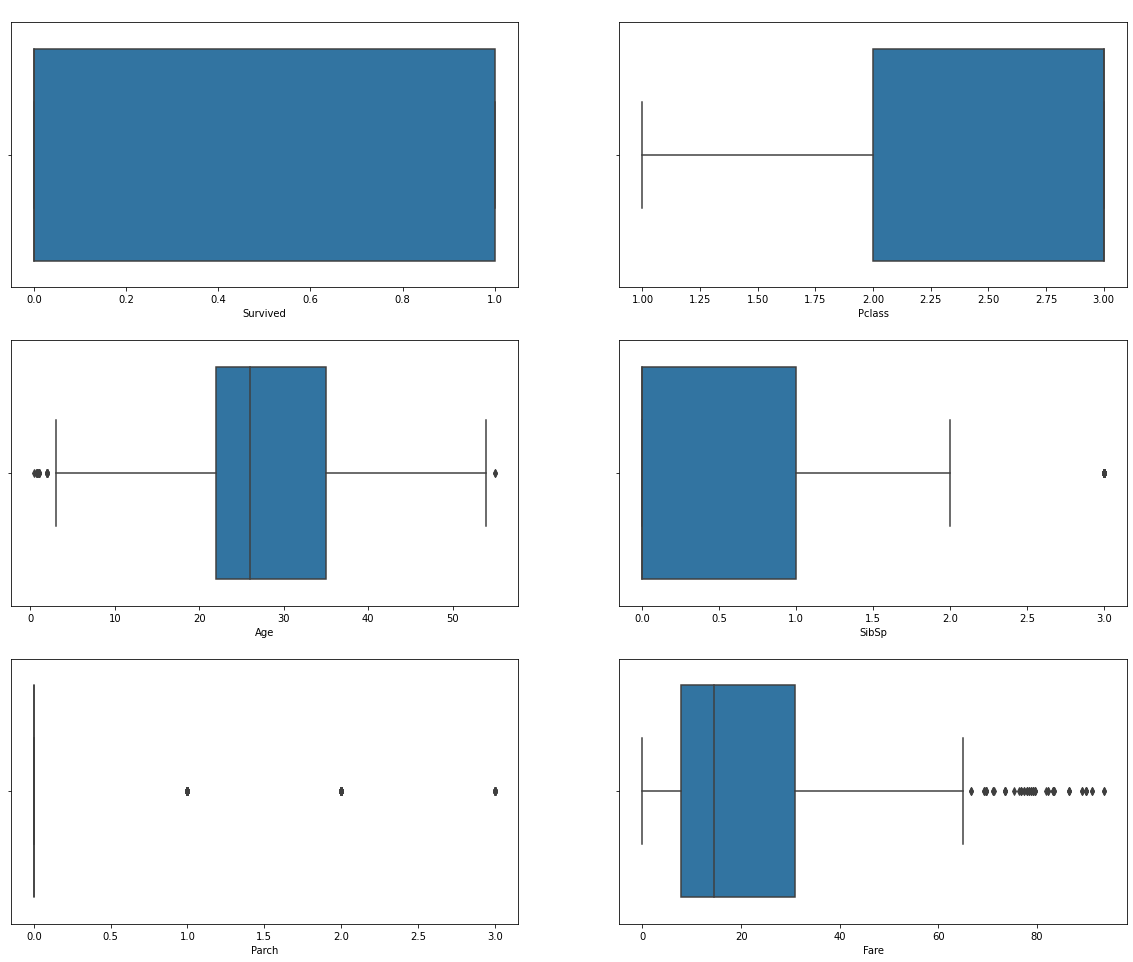

In [29]:
#Plotting the boxplot for the numerical columns
j=1
plt.figure(figsize=(20,40))
col = ['Survived','Pclass','Age','SibSp','Parch','Fare']
for i in col:
    plt.subplot(len(col)+1,2,j)
    sns.boxplot(df[i])
    plt.title(i,color='white')
    j=j+1

In [30]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,25.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# one hot encoding

In [31]:
df1=pd.get_dummies(data=df,columns=['Sex','Embarked'])

In [32]:
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,25.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [33]:
#dropping dummy variable trap columns 
df1.drop(['Sex_female','Embarked_S'],axis=1,inplace=True)

In [34]:
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q
0,0,3,22.0,1,0,7.2500,1,0,0
1,1,1,38.0,1,0,71.2833,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,0
4,0,3,35.0,0,0,8.0500,1,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0
887,1,1,19.0,0,0,30.0000,0,0,0
888,0,3,25.0,1,2,23.4500,0,0,0
889,1,1,26.0,0,0,30.0000,1,1,0


In [35]:
# chcking imbalance datset or not
df1['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [36]:
#importing standardscaler 
from sklearn.preprocessing import StandardScaler
#importing train_test_split
from sklearn.model_selection import train_test_split
#applying standardscaler for AGE and FARE column
std_scaler = StandardScaler()
df1[['Age','Fare']]=std_scaler.fit_transform(df[['Age','Fare']])

In [37]:
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q
0,0,3,-0.521286,1,0,-0.774384,1,0,0
1,1,1,0.928836,1,0,2.402241,0,1,0
2,1,3,-0.158755,0,0,-0.740898,0,0,0
3,1,1,0.656938,1,0,1.500187,0,0,0
4,0,3,0.656938,0,0,-0.734697,1,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,-0.068123,0,0,-0.489133,1,0,0
887,1,1,-0.793184,0,0,0.354220,0,0,0
888,0,3,-0.249388,1,2,0.029281,0,0,0
889,1,1,-0.158755,0,0,0.354220,1,1,0


In [38]:
x=df1.drop('Survived',axis=1)
y=df1.Survived

In [39]:
#Applying the smoteenn to avoid imbalance
from imblearn.combine import SMOTEENN
sm=SMOTEENN()
x_sm,y_sm = sm.fit_resample(x,y)

In [40]:
#splitting the dataset into training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.3)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [42]:
#hyperparameter tuning for logisticRegression
g_log=GridSearchCV(LogisticRegression(),{
    'C':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
})
g_log.fit(x_sm,y_sm)
g_log.best_params_

{'C': 3}

In [43]:
#LogisticRegression
log=LogisticRegression(C=3)
log.fit(X_train,y_train)
y_pred_log = log.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

[[ 82   4]
 [ 14 101]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        86
           1       0.96      0.88      0.92       115

    accuracy                           0.91       201
   macro avg       0.91      0.92      0.91       201
weighted avg       0.92      0.91      0.91       201



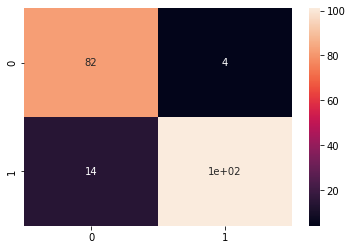

In [45]:
cm_log = confusion_matrix(y_test,y_pred_log)
print(cm_log)
print(sns.heatmap(cm_log , annot=True))
print(classification_report(y_test,y_pred_log) )

In [46]:
#hyperparameter tuning for DecessionTreeClassifier
g_dtc=GridSearchCV(DecisionTreeClassifier(),{
    "criterion":['gini', 'entropy','log_loss'],"splitter":["best", 'random']
    })
g_dtc.fit(x_sm,y_sm)
g_dtc.best_params_

{'criterion': 'gini', 'splitter': 'random'}

In [47]:
#DecessionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best')
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)


[[ 83   3]
 [  8 107]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        86
           1       0.97      0.93      0.95       115

    accuracy                           0.95       201
   macro avg       0.94      0.95      0.94       201
weighted avg       0.95      0.95      0.95       201



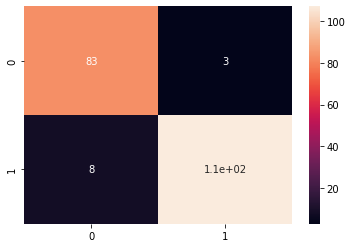

In [48]:
cm_dtc = confusion_matrix(y_test,y_pred_dtc)
print(cm_dtc)
print(sns.heatmap(cm_dtc , annot=True))
print(classification_report(y_test,y_pred_dtc) )

In [49]:
#hyperparameter tuning for KNNClassifier
g_knn=GridSearchCV(KNeighborsClassifier(),{
    "n_neighbors":[1,2,3,4.5,6,7,8,9,10],'weights':['uniform','distance']
})
g_knn.fit(x_sm,y_sm)
g_knn.best_params_

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 207, in fit
    return self._fit(X, y)
  File "C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 605, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class '

{'n_neighbors': 1, 'weights': 'uniform'}

In [50]:
#KNNClassifier
knn = KNeighborsClassifier(n_neighbors=1,weights='uniform')
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)


[[ 84   2]
 [  3 112]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        86
           1       0.98      0.97      0.98       115

    accuracy                           0.98       201
   macro avg       0.97      0.98      0.97       201
weighted avg       0.98      0.98      0.98       201



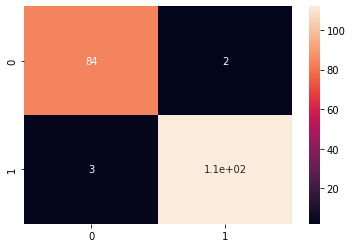

In [51]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
print(cm_knn)
print(sns.heatmap(cm_knn , annot=True))
print(classification_report(y_test,y_pred_knn) )

In [52]:
#NaiveBayes Classifier
GNB = GaussianNB()
GNB.fit(X_train,y_train)
y_pred_GNB = GNB.predict(X_test)


[[ 79   7]
 [ 15 100]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        86
           1       0.93      0.87      0.90       115

    accuracy                           0.89       201
   macro avg       0.89      0.89      0.89       201
weighted avg       0.89      0.89      0.89       201



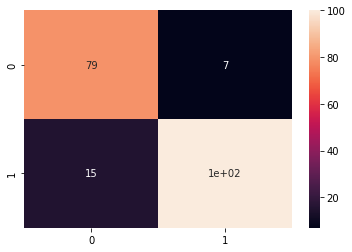

In [53]:
cm_GNB = confusion_matrix(y_test,y_pred_GNB)
print(cm_GNB)
print(sns.heatmap(cm_GNB , annot=True))
print(classification_report(y_test,y_pred_GNB) )

# Accuracy score
# logisticRegresiion -------- 91%
# DecessionTreeClassifier --- 95%
# KNN classifier ------------ 98%
# Naive bayes   ------------- 89%